In [10]:
import os
import wfdb
import pickle
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import load_model
import matplotlib.animation as animation
np.set_printoptions(suppress=True)
from utils import BlurPooling1D
from keras.utils import CustomObjectScope,plot_model
%matplotlib inline

## Calculate normalization parameters for each cross validation

In [3]:
def get_normalization_param(test_keys):
    max_norm = 0
    min_norm = 10000
    for key in keys:
        if key in test_keys:continue
        with open(os.path.join(dataset_root,key+".pickle"),"rb") as f:
            dataset = pickle.load(f)
        X = dataset["X"]
        if np.max(X) > max_norm:
            max_norm = np.max(X)
        if np.min(X) < min_norm:
            min_norm = np.min(X)
    return min_norm,max_norm

In [4]:
dataset_root = "./dataset_RRI"
cross = 5
keys = [i.split(".")[0] for i in os.listdir(dataset_root) if not "cross" in i and ".pickle" in i]
for cross_idx in range(cross):
    file = os.path.join(dataset_root,"dataset-cross"+str(cross_idx)+".pickle")
    with open(file,"rb") as f:
        dataset=pickle.load(f)
    test_keys = dataset["test_key"]
    min_norm,max_norm = get_normalization_param(test_keys)
    print(cross_idx,min_norm,max_norm)

0 47 651
1 47 651
2 47 651
3 47 651
4 47 651


## Check model structure

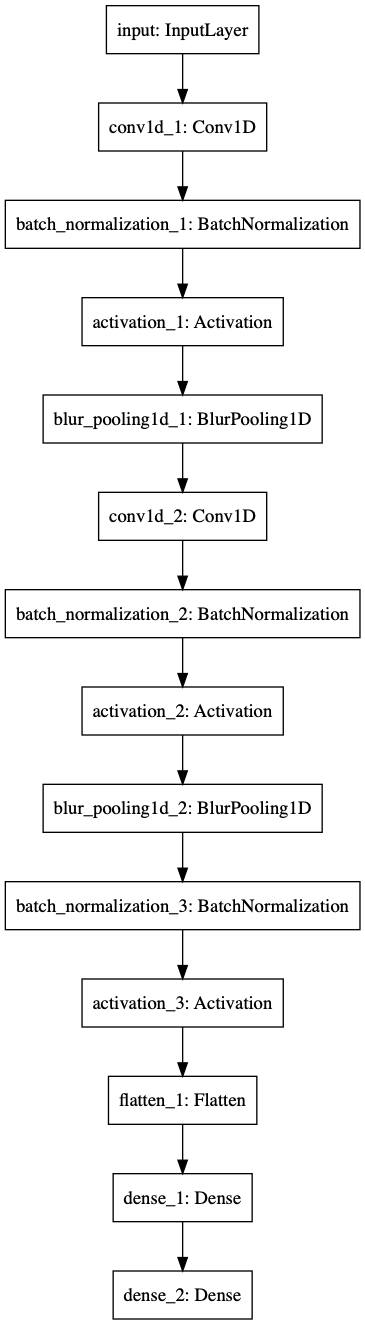

In [16]:
model_path = "./Result_CNN_pool2/results_max/models/11-model.h5"
with CustomObjectScope({'BlurPooling1D': BlurPooling1D}):
    model = load_model(model_path)
plot_model(model,"figs/2CNN.png")